In [1]:
# load library

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statistics

from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, 
                           ema_logging, Constant, Scenario, Policy)
from ema_workbench import load_results
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging
from ema_workbench import save_results

from SALib.analyze import sobol
from ema_workbench.em_framework.evaluators import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

ema_logging.log_to_stderr(ema_logging.INFO)

from ema_workbench.em_framework.evaluators import BaseEvaluator
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation


dike_model, planning_steps = get_model_for_problem_formulation(1)

policies = [Policy("base case without policy", **{k.name: 0 for k in dike_model.levers})]
problem = get_SALib_problem(dike_model.uncertainties)

start = time.time()

with MultiprocessingEvaluator(dike_model) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios=4, policies = policies, uncertainty_sampling=Samplers.SOBOL)

end = time.time()

print('Total run time:{} min'.format((end - start)/60))

# Save the results
save_results(sa_results, './results/sobol_results.tar.gz')

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 160 scenarios * 1 policies * 1 model(s) = 160 experiments
100%|████████████████████████████████████████| 160/160 [00:12<00:00, 12.47it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\floor\PycharmProjects\EPA141A-labs\final assignment\results\sobol_results.tar.gz


Total run time:0.6972056825955709 min


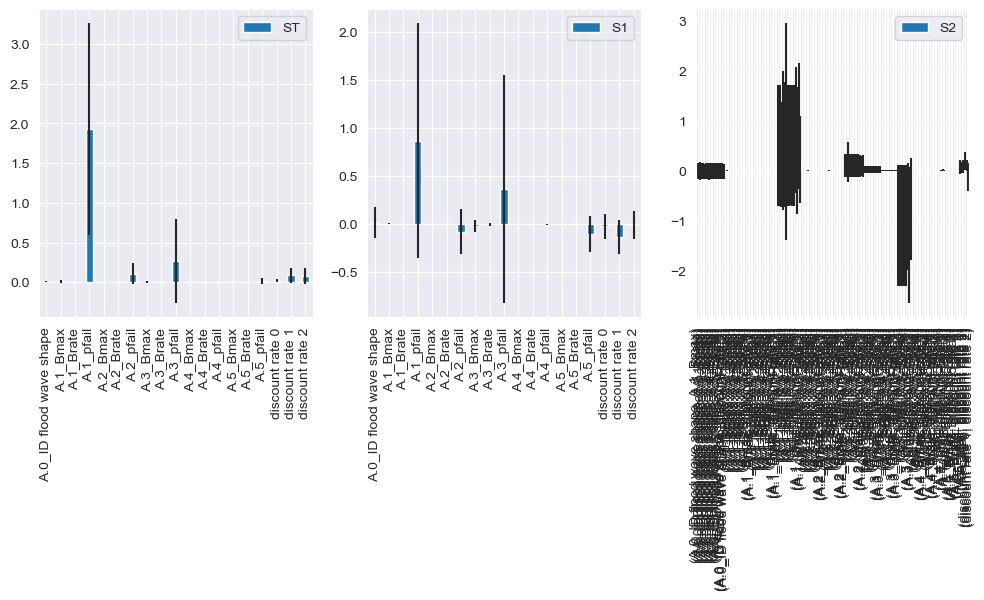

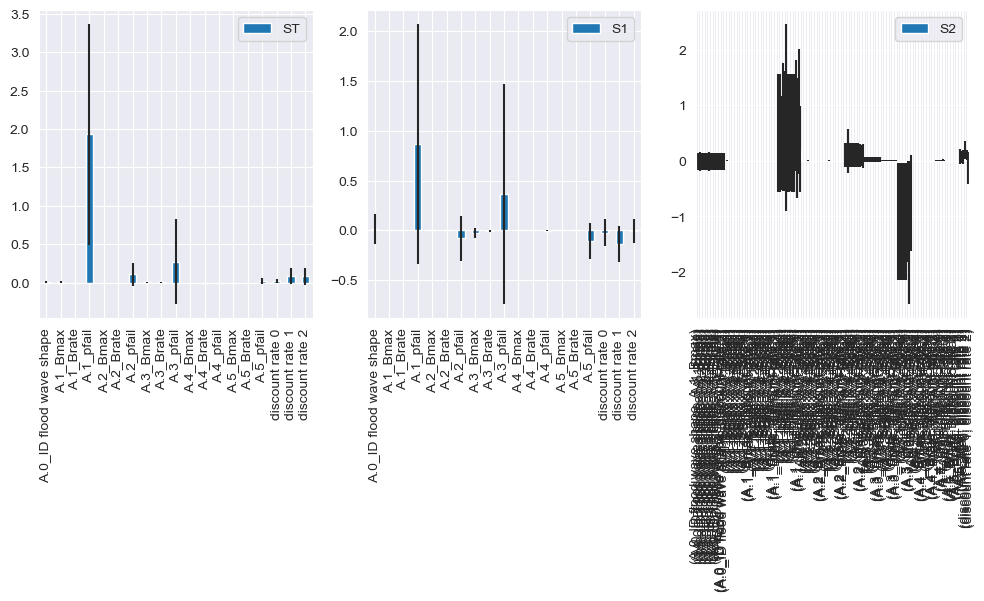

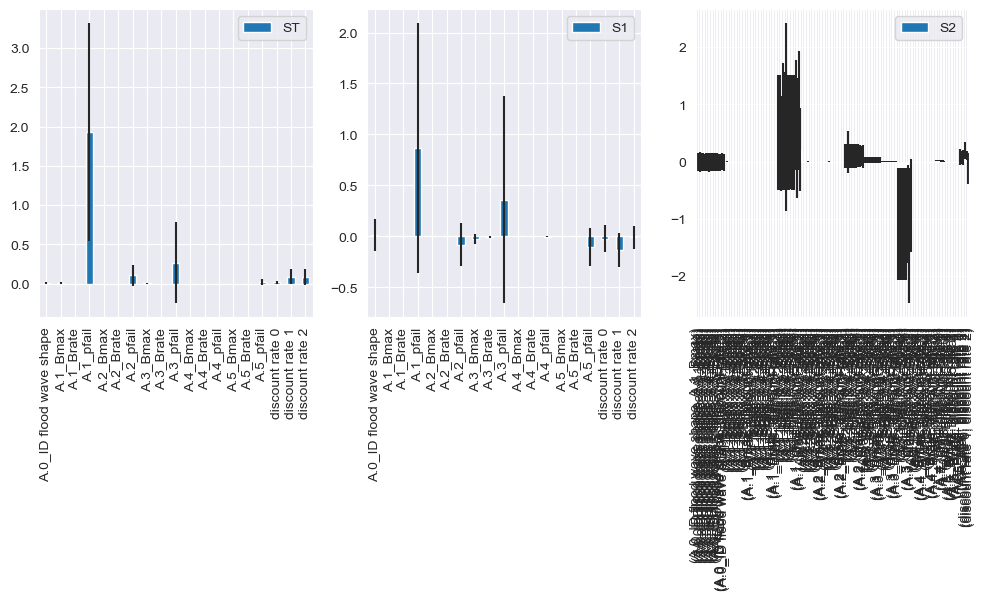

In [23]:
from SALib.analyze.sobol import analyze
experiments, results = sa_results
for key in results.keys():
    sobol_results = {}
    for policy in experiments.policy.unique():
        logical = experiments.policy == policy
        y = results['Expected Annual Damage'][logical]
        indices = analyze(problem, y)
        sobol_results[policy] = indices
        
    fig, axes = plt.subplots(1,3)
    fig.set_size_inches(12, 4)
    indices.plot(ax=axes)

In [17]:
experiments, results = sa_results
results.keys()

dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths'])

Interpretation: A1_pfail and A3_pfail are the most dominant parameters to which the model is sensitive. The relatively small differences between the first-order effects and total-order effects suggest that most of the sensitivity is due to direct effects rather than due to interaction effects.\

A1_pfail = probability that the dike from dikering 1 will withstand the hydraulic load.\
A3_pfail = probability that the dike from dikering 3 will withstand the hydraulic load.

S2 is not readable :)